# Logistic Regression in plain Python

## 1. What is logistic regression?

Logistic regression is used to as a **categorical** algorithm, We alread know linear regression as: $Y = aX + b$, and y ranges from $[-\infty,+\infty]$, so how can we catogorize our data?

What we do is to take $Y$ to a **Sigmoid function**, which will return a numerical value S ranges from $[0,1]$. S can be seen as a probability, say greater than 0.5 means positive, less than 0.5 is negative.

![](https://github.com/zotroneneis/machine_learning_basics/raw/a3a4c68c81b8f71c792340de5d4ab67ae333afa1//figures/logistic_regression.jpg)

## 2. What is sigmoid function?

$$
S(t)=\frac{1}{1+e^{-t}}
$$

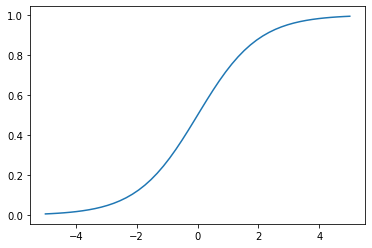

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(arr, scale=1):
    arr = np.asarray(arr)
    result = 1/(1 + np.exp(-arr*scale))
    return result

x = np.linspace(-5, 5)
y = sigmoid(x)

fig, ax = plt.subplots()
ax.plot(x, y)

$$
S(a,b)=\frac{1}{1+e^{aX+b}}
$$

So all values sigmoid function return will fall into $[0,1]$, and we set 0.5 as a threshold, so we get $[0,0.5)$ as "No", $[0.5,1]$ as "Yes", categorize done!

## 3. What is loss function?

In logistic regression we use **log loss function** as loss function:

$$
\operatorname{Cost}\left(h_{\theta}(x), y\right)=\left\{\begin{aligned}
-\log \left(h_{\theta}(x)\right) & \text { if } y=1 \\
-\log \left(1-h_{\theta}(x)\right) & \text { if } y=0
\end{aligned}\right.
$$

Why we use log function here? Think this way:
* If true value is 1, but our predcit value is 0, then $log0= \infty$, which means a maximum punishment;
* If true value is 1, our predict value is 1, then $log1=0$, which means no punishment.

## 4. Can logistic regression be used in multi-class categorize rather than binary?

Yes, think this way:
* We regrad `class 1` as positive, all other class as negative, and we get `class 1`'s probability p1
* And then we regard `class 1` as positive, all other class as negative, we get `class 2`'s probability p2
* ...
* In this way we can get `class i`'s probability pi

## 5. Advantages of logistic regression (LR)

* LR can return probability, rather than just a Yes or No.
* LR is easy to intepret and control
* LR's training is time-effective

## 6. How we do in plain Python?

**Step 0**: Initialize the weight vector and bias with zeros (or small random values)

**Step 1**:  Compute a linear combination of the input features and weights. This can be done in one step for all training examples, using vectorization and broadcasting: $a = X \cdot \omega +b$

$X$ is a matrix of shape $(n_samples, n_features)$ that holds all training examples, and $\cdot$ means dot product.

**Step 2**: Apply the sigmoid function, which returns values between 0 and 1

$$
\hat{\boldsymbol{y}}=\sigma(\boldsymbol{a})=\frac{1}{1+\exp (-\boldsymbol{a})}
$$

**Step 3**: Compute the cost over the whole training set. We want to model the probability of the target values being 0 or 1. So during training we want to adapt our parameters such that our model outputs high values for examples with a positive label (true label being 1) and small values for examples with a negative label (true label being 0). This is reflected in the cost function:

$$
J(\boldsymbol{w}, b)=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \log \left(\hat{y}^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-\hat{y}^{(i)}\right)\right]
$$

**Step 4**: Compute the gradient of the cost function with respect to the weight vector and bias. A detailed explanation of this derivation can be found here.

The general formula is given by:

$$
\frac{\partial J}{\partial w_{j}}=\frac{1}{m} \sum_{i=1}^{m}\left[\hat{y}^{(i)}-y^{(i)}\right] x_{j}^{(i)}
$$

For the bias, the inputs ${x_j}^{(i)}$ will be given 1.

**Step5**: Update the weights and bias

$$
\begin{aligned}
&\boldsymbol{w}=\boldsymbol{w}-\eta \nabla_{w} J \\
&b=b-\eta \nabla_{b} J
\end{aligned}
$$

where $\eta$ is learning rate

## 7. Code

### Import library

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(123)

%matplotlib inline

### Prepare dataset

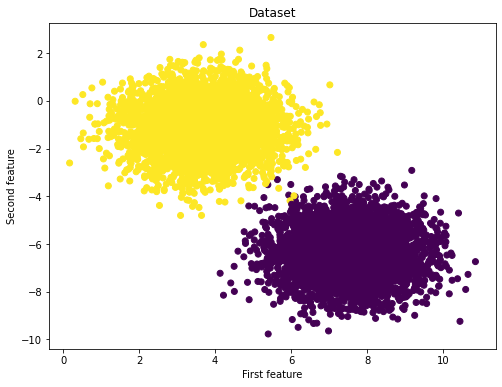

In [27]:
# We will perform logistic regression using a simple toy dataset of two classes
X, y_true = make_blobs(n_samples= 8000, centers=2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [28]:
# Reshape targets to get column vector with shape (n_samples, 1)
y_true = y_true[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (6000, 2)
Shape y_train: (6000, 1)
Shape X_test: (2000, 2)
Shape y_test: (2000, 1)


### Logistic regression class

In [29]:
class LogisticRegression:
    
    def __init__(self):
        pass

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))

    def train(self, X, y_true, n_iters, learning_rate):
        """
        Trains the logistic regression model on given data X and targets y
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        costs = []
        
        for i in range(n_iters):
            # Step 1 and 2: Compute a linear combination of the input features and weights, 
            # apply the sigmoid activation function
            y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
            
            # Step 3: Compute the cost over the whole training set.
            cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))

            # Step 4: Compute the gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predict - y_true))
            db = (1 / n_samples) * np.sum(y_predict - y_true)

            # Step 5: Update the parameters
            self.weights = self.weights - learning_rate * dw
            self.bias = self.bias - learning_rate * db

            costs.append(cost)
            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")

        return self.weights, self.bias, costs

    def predict(self, X):
        """
        Predicts binary labels for a set of examples X.
        """
        y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_predict_labels = [1 if elem > 0.5 else 0 for elem in y_predict]

        return np.array(y_predict_labels)[:, np.newaxis]

### Initializing and training the model

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.44577733439239176
Cost after iteration 200: 0.3701537600926714
Cost after iteration 300: 0.32700763932139393
Cost after iteration 400: 0.29902811514753336
Cost after iteration 500: 0.27917531994636574


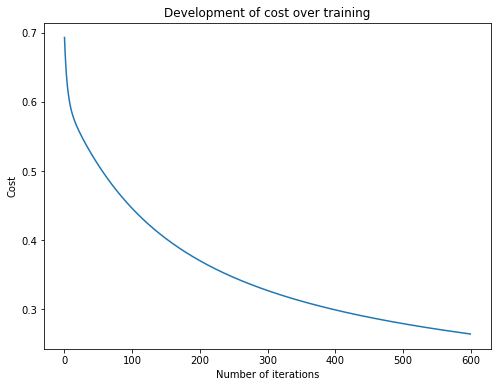

In [30]:
regressor = LogisticRegression()
w_trained, b_trained, costs = regressor.train(X_train, y_train, n_iters=600, learning_rate=0.009)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Development of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

### Testing the model

In [31]:
y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

print(f"train accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test))}%")

train accuracy: 91.33333333333333%
test accuracy: 99.9145%
